In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [3]:
runner_data = pd.read_csv("../../output/data_clean/runner_data.csv", index_col=0)
runner_data.info()

age_range_types = pd.CategoricalDtype( 
    categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)

runner_data = runner_data.assign( age_range = runner_data.age)
runner_data.age_range = pd.cut(runner_data.age_range, bins = [16,25,40,60,100], labels=['16-25','26-40','40-60','61+'])
runner_data.age_range = runner_data.age_range.astype(age_range_types)
runner_data.loc[pd.isna(runner_data.age_range), "age_range"] = 'Undefined'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64193 entries, 0 to 64192
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   runner_id             64193 non-null  object 
 1   age                   64193 non-null  float64
 2   gender                64193 non-null  object 
 3   nationality           64193 non-null  object 
 4   n_races               64193 non-null  float64
 5   avg_relative_rank     64193 non-null  float64
 6   avg_rank              64193 non-null  float64
 7   max_relative_rank     64193 non-null  float64
 8   min_relative_rank     64193 non-null  float64
 9   total_elevation       64193 non-null  float64
 10  avg_elevation         64193 non-null  float64
 11  total_distance        64193 non-null  float64
 12  avg_distance          64193 non-null  float64
 13  min_distance          64193 non-null  float64
 14  max_distance          64193 non-null  float64
 15  total_eq_distance  

In [4]:
df = runner_data.loc[runner_data.n_races > 1]

<AxesSubplot:xlabel='count', ylabel='n_races'>

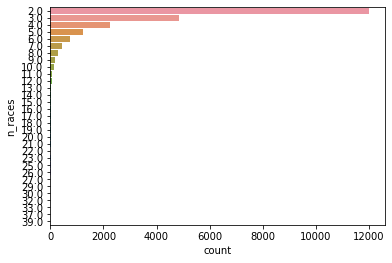

In [5]:
sns.countplot(
    y = df.n_races
)

<AxesSubplot:xlabel='age', ylabel='Count'>

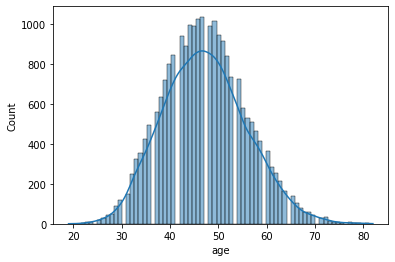

In [6]:
sns.histplot(
    x = df.age,
    kde = True
)

Index(['age', 'n_races', 'avg_relative_rank', 'avg_rank', 'max_relative_rank',
       'min_relative_rank', 'total_elevation', 'avg_elevation',
       'total_distance', 'avg_distance', 'min_distance', 'max_distance',
       'total_eq_distance', 'avg_eq_distance', 'min_eq_distance',
       'max_eq_distance', 'avg_runners', 'years_of_activity', 'avg_speed',
       'avg_equivalent_speed', 'avg_course_per_year', 'ranking_score'],
      dtype='object')


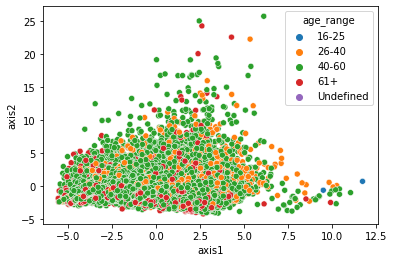

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df1 = df.drop(columns=['runner_id','gender','nationality','age_range'])
print(df1.columns)



cls = PCA(n_components=5)
pcs = cls.fit_transform(StandardScaler().fit_transform(df1))

X = pd.DataFrame(pcs, columns=["axis1", "axis2","axis3","axis4","axis5"])
X.index = df1.index
X['age_range'] = df.age_range

sns.scatterplot(x = "axis1", y = "axis2", hue = "age_range", data = X)
plt.savefig('../../../output/ACP_all_runners.pdf')


# AFTD

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS

In [9]:
df2 = runner_data.loc[runner_data.n_races > 4]
df2

,runner_id,age,gender,nationality,n_races,avg_relative_rank,avg_rank,max_relative_rank,min_relative_rank,total_elevation,...,avg_eq_distance,min_eq_distance,max_eq_distance,avg_runners,years_of_activity,avg_speed,avg_equivalent_speed,avg_course_per_year,ranking_score,age_range
13,DHAENEFrancoisFRAM36.0,36.0,M,FRA,10.0,0.006700,2.400000,0.054902,0.000376,90132.0,...,257.202000,215.30,272.56,1391.300000,8.0,8.166439,12.490916,1.250000,14.627182,26-40
19,DAUWALTERCourtneyUSAW36.0,36.0,W,USA,8.0,0.144405,14.000000,0.777778,0.004587,57420.0,...,238.375000,215.30,270.00,764.125000,8.0,7.279028,10.390956,1.000000,1.501655,26-40
20,CURMERGregoireFRAM31.0,31.0,M,FRA,7.0,0.005758,8.285714,0.009479,0.000368,60830.0,...,255.542857,233.20,270.00,1510.142857,5.0,7.436122,11.197495,1.400000,6.292421,26-40
21,PAZOSDiegoSUIM37.0,37.0,M,SUI,5.0,0.004614,9.200000,0.006996,0.001570,49568.0,...,265.576000,263.88,270.00,2020.400000,7.0,6.612203,10.547347,0.714286,1.430244,26-40
23,WONGHoChungHKGM34.0,34.0,M,HKG,5.0,0.017295,15.400000,0.030142,0.002354,46300.0,...,261.460000,240.70,271.80,1232.600000,6.0,7.009375,10.863077,0.833333,2.918753,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57848,MACKIEGlennUSAM59.0,59.0,M,USA,5.0,0.164388,152.400000,0.205691,0.119874,44757.0,...,252.734000,216.10,265.60,839.400000,1.0,5.424166,8.241057,5.000000,0.100341,40-60
58570,GARRETTScottCANM47.0,47.0,M,CAN,5.0,0.505306,20.400000,0.739130,0.369565,18560.0,...,198.340000,185.00,216.50,43.800000,1.0,6.099967,7.482928,5.000000,0.217961,40-60
60310,EPPELMANScottUSAM55.0,55.0,M,USA,5.0,0.316468,30.200000,0.479592,0.114679,29512.0,...,220.524000,179.00,265.45,114.200000,1.0,5.904336,7.719067,5.000000,0.164555,40-60
60526,MILESAndrewGBRM50.0,50.0,M,GBR,5.0,0.785352,73.000000,0.913043,0.598291,14202.0,...,189.564000,177.00,201.00,94.800000,1.0,5.849477,6.885358,5.000000,0.065889,40-60


In [10]:
df2_quant = df2.drop(columns=['runner_id','gender','nationality'])

In [11]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
X = pd.DataFrame(
    squareform(pdist(df2_quant)),
    columns = df2.runner_id,
    index = df2.runner_id
)

ValueError: Unsupported dtype object

In [ ]:
X

In [ ]:
mds = MDS(n_components=2, dissimilarity='precomputed')
aftd = mds.fit_transform(StandardScaler().fit_transform(X))

In [ ]:
new_X = pd.DataFrame(aftd, columns=["axis1","axis2"])
sns.scatterplot(
    x = "axis1",
    y = "axis2",
    data = new_X
)
#add_labels(new_Xprime.axis1, new_Xprime.axis2, new_Xprime.index)

In [ ]:
test